Start by importing the required libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

Read each datasets and concatenated them into a dataframe after the column names have been confirmed to be consistent

In [63]:
jan = pd.read_csv('file:///C:DATASETS/jan22-tripdata.csv')
feb =  pd.read_csv('file:///C:DATASETS/feb22-tripdata.csv')
march = pd.read_csv('file:///C:DATASETS/march22-tripdata.csv')
april = pd.read_csv('file:///C:DATASETS/april22-tripdata.csv')
may = pd.read_csv('file:///C:DATASETS/may22-tripdata.csv')
june = pd.read_csv('file:///C:DATASETS/june22-tripdata.csv')
july = pd.read_csv('file:///C:DATASETS/july22-tripdata.csv')
aug = pd.read_csv('file:///C:DATASETS/aug21-tripdata.csv')
sep = pd.read_csv('file:///C:DATASETS/sep21-tripdata.csv')
octo = pd.read_csv('file:///C:DATASETS/oct21-tripdata.csv')
nov = pd.read_csv('file:///C:DATASETS/nov21-tripdata.csv')
dec = pd.read_csv('file:///C:DATASETS/dec21-tripdata.csv')

In [64]:
#create a list of the months above
list_of_months =[jan, feb, march, april, may, june, july, aug, sep, octo, nov, dec]
df = pd.concat(list_of_months)

To understand how the data is organized, the data types of each column and the structure of the dataset, I applied the necessary method on the dataframe and dropped the columns that are irrelevant to answering the problem statement

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901463 entries, 0 to 247539
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 630.3+ MB


In [66]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665968,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [67]:
df.drop(['end_lat', 'end_lng', 'start_lat', 'start_lng','start_station_name','end_station_name'], axis=1, inplace=True)

In [68]:
#convert started_at and ended_at columns to datetime types
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [69]:
#calculate the ride_length and create a new column for it
df['ride_duration'] = df['ended_at'] - df['started_at']

In [70]:
#split the started_at column to have date and time separately
#convert it to string type first
df['started_at'] = df['started_at'].astype(str)
#create two new columns 
df[['start_date', 'start_time']] = df['started_at'].str.split(' ', n=1, expand=True)

In [71]:
df.rename(columns={'member_casual':'user_type', 'rideable_type':'bike_type'}, inplace=True)

In [72]:
#convert these columns back to datetime type
df['start_date'] = pd.to_datetime(df['start_date'])
df['start_time'] = pd.to_datetime(df['start_time'])

In [73]:
df.drop(['started_at','ended_at'], axis=1, inplace=True)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901463 entries, 0 to 247539
Data columns (total 8 columns):
 #   Column            Dtype          
---  ------            -----          
 0   ride_id           object         
 1   bike_type         object         
 2   start_station_id  object         
 3   end_station_id    object         
 4   user_type         object         
 5   ride_duration     timedelta64[ns]
 6   start_date        datetime64[ns] 
 7   start_time        datetime64[ns] 
dtypes: datetime64[ns](2), object(5), timedelta64[ns](1)
memory usage: 405.2+ MB


In [75]:
df.describe() #shows negative min value for ridelength which violates data constraints

,ride_duration
count,5901463
mean,0 days 00:19:53.376440
std,0 days 02:27:59.109436
min,-1 days +21:42:35
25%,0 days 00:06:10
50%,0 days 00:10:57
75%,0 days 00:19:49
max,28 days 21:49:10


Negative ride duration is defintely bad data, because it is impossible for end_time to be less than start_time

In [76]:
df = df[df['ride_duration'] > pd.Timedelta(0)]#drops the rows with negative ride_length, pd.Timedelta to compare datetime type
# keep the rows with positive ride_length

In [77]:
df.describe() #confirms there's no longer negative values
#ride_duration of one second doesn't seem right

,ride_duration
count,5900827
mean,0 days 00:19:53.539191
std,0 days 02:27:59.567066
min,0 days 00:00:01
25%,0 days 00:06:10
50%,0 days 00:10:57
75%,0 days 00:19:49
max,28 days 21:49:10


As stated in the divvy website,ride duration less than a minute  potentially false starts or users trying to redock a bike to ensure it was secure.

In [78]:
df = df[df['ride_duration'] > pd.Timedelta('00:00:60')]
#keep only rows that have ride duration of above 60 seconds

I checked the unique values of bike types available and the user types to ensure there are no membership violationor spelling errors.

In [79]:
df['bike_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [80]:
df['user_type'].unique()

array(['casual', 'member'], dtype=object)

In [81]:
df.describe()

,ride_duration
count,5795850
mean,0 days 00:20:14.710060
std,0 days 02:29:18.215165
min,0 days 00:01:01
25%,0 days 00:06:23
50%,0 days 00:11:10
75%,0 days 00:20:04
max,28 days 21:49:10


In [82]:
df.isna().sum()

ride_id                  0
bike_type                0
start_station_id    834530
end_station_id      886025
user_type                0
ride_duration            0
start_date               0
start_time               0
dtype: int64

In [83]:
df.dropna(inplace=True)
#drop rows with missing values

In [84]:
df.duplicated().any()

False

In [85]:
df.isnull().any() #no missing or duplicate values

ride_id             False
bike_type           False
start_station_id    False
end_station_id      False
user_type           False
ride_duration       False
start_date          False
start_time          False
dtype: bool

Extracted month, year, day of the week. I assigned day_names to the numbers returned by the weekday function with Monday being 0.

In [86]:
#create a new column for months and year from start_date
df['month'] = pd.DatetimeIndex(df['start_date']).month
df['year'] = pd.DatetimeIndex(df['start_date']).year

In [87]:
#new column that contains the day of the week using the weekday function
df['day_of_week'] = df['start_date'].apply(lambda x:x.weekday())
df['day_of_week'].unique()

array([3, 0, 1, 6, 5, 4, 2], dtype=int64)

In [88]:
#assign day_names to the numbers using a dictionary
names = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['day_name'] = df['day_of_week'].apply(lambda n:names[n])

In [89]:
df['day_of_week'].mode() #the day with the most frequent ride is Saturday

0    5
dtype: int64

I converted ride duration column from a timedelta64[ns](represents difference in two dates or times) datatype to seconds and then divided by 60 to be able to perform arithemetic operations on it now and later.

In [90]:
df['ride_duration'] = df['ride_duration'].dt.total_seconds()
#converts the timedelta to seconds
df['ride_duration'] = df['ride_duration'] / 60
#converts the timedelta to minutes

Reduced number of rows from 5901463 to 4559381

In [91]:
df.shape

(4559381, 12)

In [92]:
df.dtypes

ride_id                     object
bike_type                   object
start_station_id            object
end_station_id              object
user_type                   object
ride_duration              float64
start_date          datetime64[ns]
start_time          datetime64[ns]
month                        int64
year                         int64
day_of_week                  int64
day_name                    object
dtype: object

In [93]:
#sort the data by ride_length
df.sort_values('ride_duration', axis=0, ascending=True, inplace=True)

ANALYSIS

In [94]:
user_count = df['user_type'].value_counts()
user_count #there are more subscribers than casual riders

member    2634378
casual    1925003
Name: user_type, dtype: int64

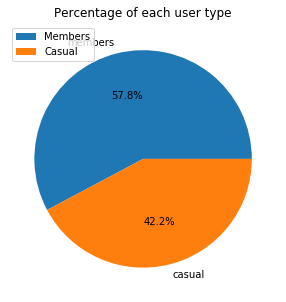

In [95]:
#pie chart to visualize the proportion of the user_type
types=['members','casual']
plt.pie(user_count, autopct='%1.1f%%', labels=types)
plt.title('Percentage of each user type')
plt.legend(['Members','Casual'], loc='upper left')

In [96]:
#subgroup the users into separate dataframes
members = df[df['user_type'] == 'member']
casuals = df[df['user_type'] == 'casual']

In [97]:
#average ride_length for each category
avg_ridelen_mem = members['ride_duration'].mean()
avg_ridelen_mem

12.811131678899983

In [98]:
avg_ridelen_cas = casuals['ride_duration'].mean()
avg_ridelen_cas

26.95291292186624

Used a pivot table to show the average ride duration for each day of the week by user type and visualized with a line plot

In [99]:
#average ride duration for member and casual riders by day of week
table = df.pivot_table(values='ride_duration', index='day_of_week', columns='user_type')

In [100]:
print(table)

user_type       casual     member
day_of_week                      
0            28.009110  12.414614
1            23.488891  11.939438
2            23.086425  12.079342
3            23.695949  12.256004
4            24.959385  12.460055
5            29.402892  14.480261
6            31.013723  14.605676


([<matplotlib.axis.XTick at 0x22b92eed888>,
 <a list of 7 Text xticklabel objects>)

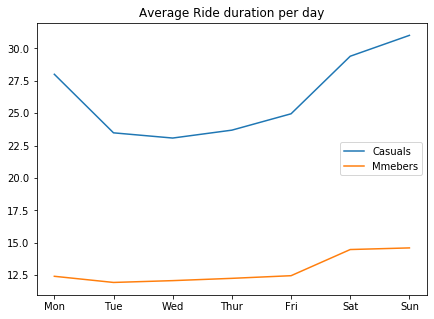

In [101]:
plt.plot(table)
plt.title('Average Ride duration per day')
plt.legend(['Casuals', 'Mmebers'], loc='center right')
labels = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
plt.xticks(table.index, labels)

Created a pivot table to show the number of rides for each day grouped by usertype and plotted the result.

In [102]:
ridecount_table = df.pivot_table(values='ride_id', index='day_of_week', columns='user_type', aggfunc={'ride_id':'count'})
print(ridecount_table)

user_type    casual  member
day_of_week                
0            226438  371256
1            202024  413159
2            208081  411937
3            234669  407722
4            260541  358874
5            417386  349020
6            375864  322410


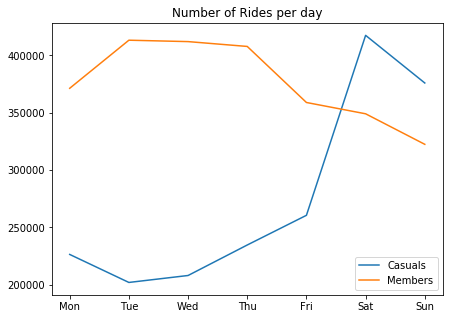

In [103]:
plt.plot(ridecount_table)
plt.title('Number of Rides per day')
plt.legend(['Casuals', 'Members'], loc='lower right')
labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(ridecount_table.index, labels)
plt.rcParams['figure.figsize'] = [7,5] 

In [104]:
#most frequent ride day for each user type
mode_day_mem = members['day_of_week'].mode()
mode_day_cas = casuals['day_of_week'].mode()
print(mode_day_mem) #Tuesday records the highest number of rides for members)
print(mode_day_cas) #Saturday records the highest number of rides for members

0    1
dtype: int64
0    5
dtype: int64


Note: The dataset dates from August 2021 to July 2022, so the index of the pivot table of the ride count for each month is an incorrect arrangement. I grouped the months by season according to the Chicago weather data and plotted a column graph to show the aggregated number of rides.

In [105]:
ridetype_table = df.pivot_table(values='ride_id', index='month', aggfunc={'ride_id':'count'})
print(ridetype_table) 


       ride_id
month         
1        79045
2        87638
3       212865
4       268498
5       494029
6       609721
7       630792
8       665995
9       613284
10      471382
11      252154
12      173978


In [106]:
#number of rides for each user type by rideable_type
ridecount_ptype_mem = members.groupby('user_type')['ride_id'].count()
ridecount_ptype_cas = casuals.groupby('user_type')['ride_id'].count()
print(ridecount_ptype_cas) #classic bike is also the most common for the casual riders
print(ridecount_ptype_mem) #members ride the classic bike more than the elctric bike with no rides for the docked type

user_type
casual    1925003
Name: ride_id, dtype: int64
user_type
member    2634378
Name: ride_id, dtype: int64


The visualization below shows that classic bike is the most preferred bike type for both categories and casuals being the only users of the docked bike type

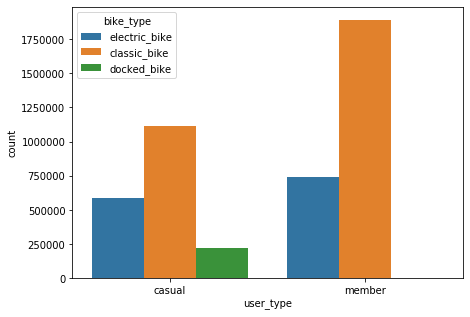

In [107]:
#categorical visualization shows the number of users for each user type, grouped by the bike type
sns.countplot(x='user_type', hue='bike_type', data=df)

In [108]:
df['hour'] = df['start_time'].dt.hour
#to extract the hours the rides started from the time

In [109]:
df.dtypes 
#to review columns that are no longer useful

ride_id                     object
bike_type                   object
start_station_id            object
end_station_id              object
user_type                   object
ride_duration              float64
start_date          datetime64[ns]
start_time          datetime64[ns]
month                        int64
year                         int64
day_of_week                  int64
day_name                    object
hour                         int64
dtype: object

In [110]:
df.drop(['start_date','start_time','end_station_id'], axis=1, inplace=True)

I assigned names to each months using the key value pairs, apply method to apply the short function over the month column of the dataframe. Then assigned the corresponding weather conditions to each month, created a pivot table for this and filled the missing values with 0 as that means there was no rides during those months. 
The countplot for this shows that 'Summer' season records the highest number of rides with winter being the lowest.

In [111]:
names = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['month'] = df['month'].apply(lambda n: names[n])
df['month'].head()

152632    Aug
700478    Jun
148878    Nov
259790    Jun
119728    Aug
Name: month, dtype: object

In [112]:
df.drop(['day_of_week'], axis=1, inplace=True)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4559381 entries, 152632 to 192711
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   ride_id           object 
 1   bike_type         object 
 2   start_station_id  object 
 3   user_type         object 
 4   ride_duration     float64
 5   month             object 
 6   year              int64  
 7   day_name          object 
 8   hour              int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 387.9+ MB


In [114]:
seasons = {'Jan':'Winter','Feb':'Winter','Mar':'Spring','Apr':'Spring','May':'Spring','Jun':'Summer','Jul':'Summer','Aug':'Summer','Sep':'Fall','Oct':'Fall','Nov':'Fall','Dec':'Winter'
    }
df['season'] = df['month'].apply(lambda s: seasons[s])

In [115]:
season_table = df.pivot_table(values='ride_id',index='month',columns='season', aggfunc={'ride_id':'count'}, fill_value=0)
print(season_table)

season    Fall  Spring  Summer  Winter
month                                 
Apr          0  268498       0       0
Aug          0       0  665995       0
Dec          0       0       0  173978
Feb          0       0       0   87638
Jan          0       0       0   79045
Jul          0       0  630792       0
Jun          0       0  609721       0
Mar          0  212865       0       0
May          0  494029       0       0
Nov     252154       0       0       0
Oct     471382       0       0       0
Sep     613284       0       0       0


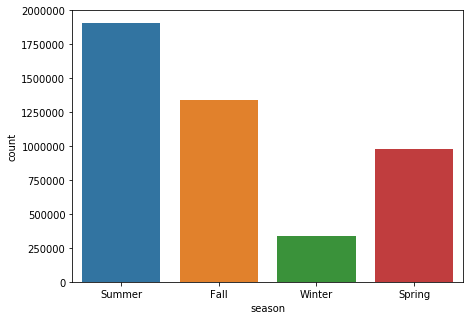

In [116]:
sns.countplot(data=df, x='season')

In [117]:
df.head()

,ride_id,bike_type,start_station_id,user_type,ride_duration,month,year,day_name,hour,season
152632,61DBC85A61582C41,electric_bike,TA1308000001,casual,1.016667,Aug,2021,Fri,22,Summer
700478,68428A6AD69DE0C9,classic_bike,TA1307000117,casual,1.016667,Jun,2022,Fri,12,Summer
148878,5CA46E221B765C22,electric_bike,TA1307000142,member,1.016667,Nov,2021,Sun,22,Fall
259790,7F66B9FCC580E8B0,classic_bike,SL-005,member,1.016667,Jun,2022,Thu,16,Summer
119728,2B1B00FBAD563240,classic_bike,15575,member,1.016667,Aug,2021,Fri,12,Summer


In [118]:
df.describe()

,ride_duration,year,hour
count,4.559381e+06,4.559381e+06,4.559381e+06
mean,1.878189e+01,2.021523e+03,1.420495e+01
std,8.260244e+01,4.994905e-01,4.984825e+00
min,1.016667e+00,2.021000e+03,0.000000e+00
25%,6.583333e+00,2.021000e+03,1.100000e+01
50%,1.140000e+01,2.022000e+03,1.500000e+01
75%,2.040000e+01,2.022000e+03,1.800000e+01
max,4.162917e+04,2.022000e+03,2.300000e+01


Saved the clean dataset as cyclistic.csv 

In [119]:
df.to_csv('C:\CSV_FILES\cyclistic.csv', header=True)